Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

🎓 Laboratório 4 - Árvore de decisão

---
> 👨‍🏫*Professor Dr. Rooney Coelho (rracoelho@pucsp.br)*
---

### Sobre o exercício
Neste exercício de laboratório, você aprenderá um algoritmo popular de aprendizado de máquina, a árvore de decisão. 

Você usará este algoritmo de classificação para construir um modelo a partir de dados históricos de pacientes e sua resposta a diferentes medicamentos. 

Em seguida, você usa a árvore de decisão treinada para prever a classe de um paciente desconhecido ou para encontrar um medicamento adequado para um novo paciente.

### Sobre o Dataset
Imagine que você seja um pesquisador médico compilando dados para um estudo. Você coletou dados sobre um conjunto de pacientes, todos com a mesma doença. Durante o curso do tratamento, cada paciente respondeu a um dos 5 medicamentos, medicamento A, medicamento B, medicamento C, medicamento X e Y.

Parte do seu trabalho é construir um modelo para descobrir qual medicamento pode ser apropriado para um futuro paciente com a mesma doença. Os conjuntos de recursos desse conjunto de dados são idade, sexo, pressão arterial e colesterol dos pacientes, e o alvo é o medicamento ao qual cada paciente respondeu.

É um exemplo de classificador binário e você pode usá-lo para construir uma árvore de decisão e, em seguida, usá-la para prever a classe de um paciente desconhecido ou prescrevê-la para um novo paciente.

## Importação dos dados

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np


1) Importe o dataset usando o pandas:

In [27]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv'
df = pd.read_csv(url)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Confira se a importação foi bem sucedida ao executar o método `head()`. 

In [28]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Pré-processamento

Declare duas variáveis:
* `X` para as features
* `y` para o target (`Drug`)

2) Preencha o bloco abaixo com um Dataframe para as features somente

In [29]:
x = df.iloc[:,:-1]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


3) Preencha o bloco abaixo para o target. Use a estrutura Dataset do Pandas para isso

In [30]:
y = df['Drug']
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

4) Como temos dados categóricos, é necessário que você transforme seus valores em fatores. Use o método `factorize()` do Pandas para isso. Lembre-se que isso te retornará dois argumentos.

*Obs: faça uma pesquisa sobre como fatorizar todas as colunas categóricas. A intenção dessas atividades também é que você tenha facilidade em realizar esse tipo de pesquisa.*

In [31]:
def to_numeric(data):
    cat_columns = data.select_dtypes(['object']).columns
    data[cat_columns] = data[cat_columns].apply(lambda i: pd.factorize(i)[0])
    return data

In [32]:
to_numeric(x)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


## Criação do modelo

Agora que você já converteu as features em valores numéricos (Com excessão da idade e Na_to_K), faça o que se pede.


5) Crie um classificador árvore de decisão e use o argumento `entropy` para o parâmetro `criterion`. Use o parâmetro `max_depth` igual a 4.

In [33]:
# Criar o modelo
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)


6) Treine sua árvore de decisão com a integralidade dos dados.

In [34]:
# Treinar o modelo
drugTree.fit(x.values,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

7) Gere um gráfico através do método `plot_tree` use nosso exemplo de sala para se basear (olhem o caderno enviado para vocês).

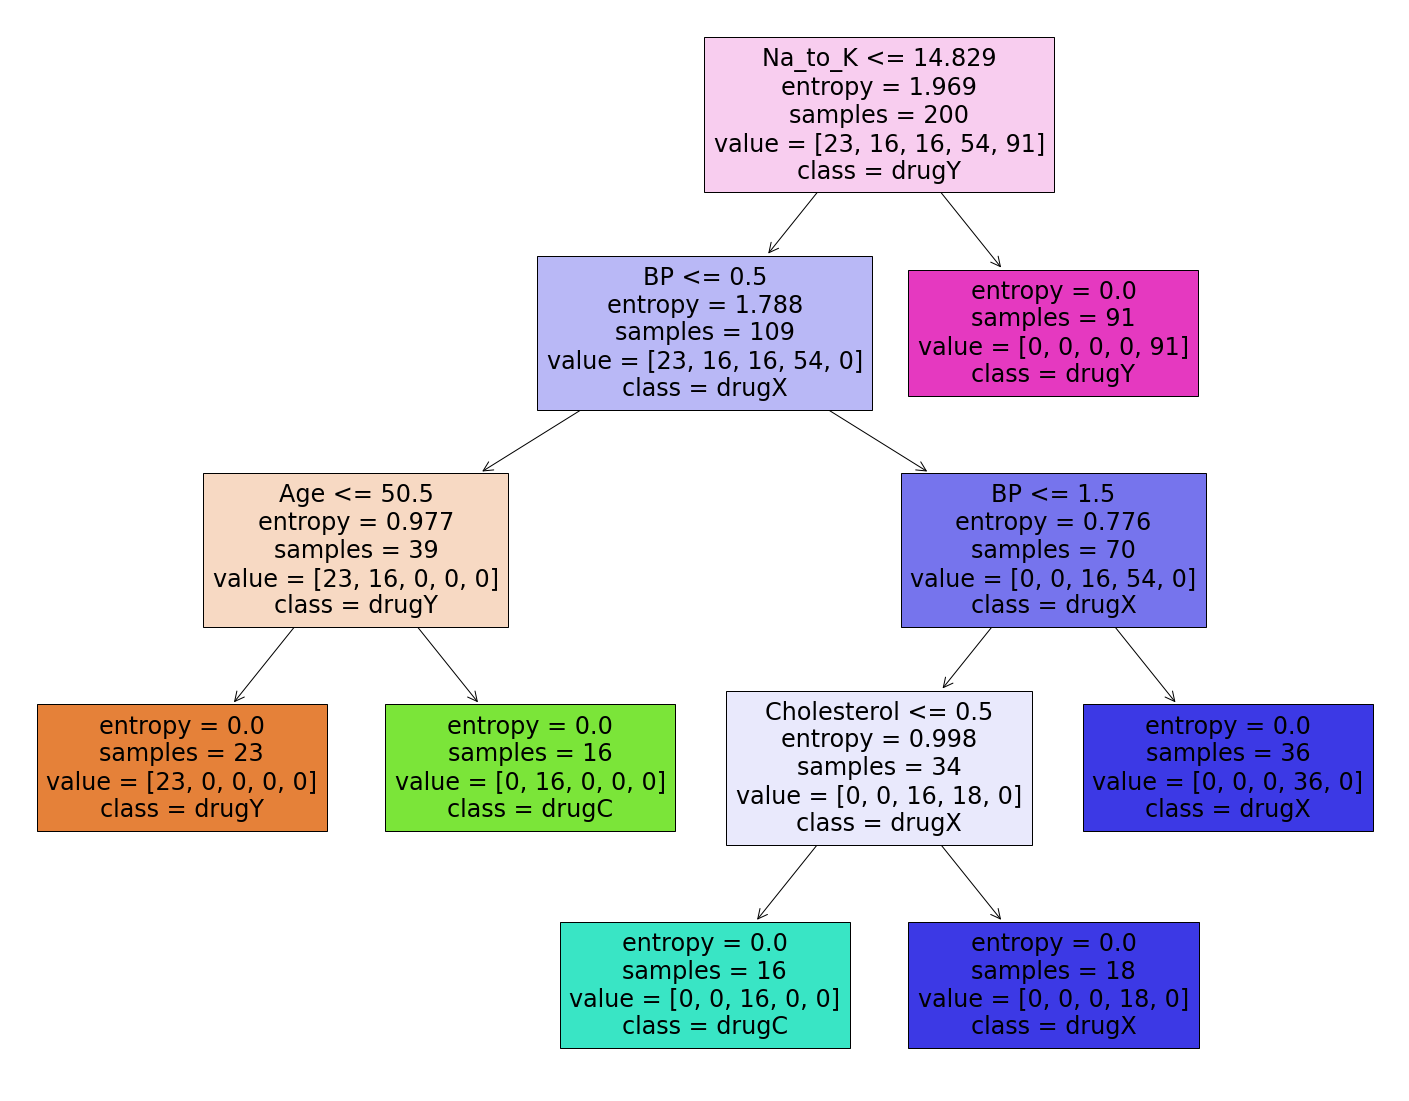

In [35]:
# Gera a figura através do plot_tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(drugTree,
                     feature_names=x.columns,
                        class_names=y,
                        filled=True)

8) Use a árvore de decisão para me indicar (método `predict`) qual remédio tomar:

**Paciente:** 
Rooney Coelho
* Age: 32
* Sexo: M
* BP: NORMAL
* Cholesterol: NORMAL
* Na_to_K: 12

*Obs: Não me passe o medicamento errado!*

KKKKKKKKKKK 🤣

In [36]:
# use a arvore para prever o dados rooney, age: 32, BP: Normal, Cholesterol: Normal, Na_to_K: 12
drugTree.predict([[32, 1, 2, 1, 12]])

array(['drugX'], dtype=object)

9) Qual a feature mais importante para a árvore? Eu acho que é o sexo. Estou correto? Use o método `feature_importances_` para justificar seu ponto.

A Feature mais importante, na minha opinião e de acordo com o feature_importances_, foi Na_to_K (concentração de sódio e potássio no sangue) que dividiu as 200 amostras em duas partes, classificando todas as amostras da droga B com entropia = 0.0 .

<AxesSubplot:>

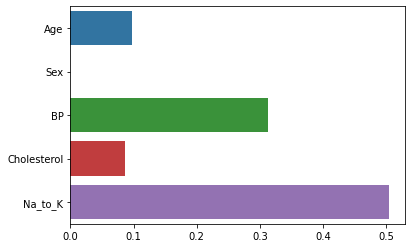

In [37]:
# feature importance
import seaborn as sns
sns.barplot(x=drugTree.feature_importances_, y=x.columns)


## Segmentação dos dados e Validação do modelo

In [38]:
from sklearn.model_selection import train_test_split

10) Particione os dados em X_test e X_train para as features e y_train e y_test para os targets. Use a proporção padrão do método `train_test_split` para isso.

In [39]:
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

11) Confira se a quantidade de linhas dos dados para teste e validação são iguais à dos dados antes da particão.

In [40]:
print(X_test.shape, X_train.shape)

(50, 5) (150, 5)


12) Treine o modelo com a partição referente ao treino das features e do target.

In [41]:
# Treinar o modelo
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

13) Qual é o percentual de acertos do modelo? Utilize a partição dedicada à testes para isso (é perto de 100%)

In [42]:
# Percentual de acertos
y_pred = drugTree.predict(X_test)
drugTree.score(X_test, y_pred)


1.0

14) Gere a matriz de confusão para mostrar as classificações incorretas. Use a forma de texto ou gere um gráfico para isso.

C:\Users\ISAAC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


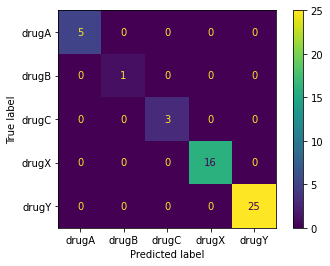

In [43]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(drugTree, X_test, y_pred)

**Dica:** Use os dados segmentados para validar o modelo. Depois de confirmar que o modelo atende as espectativas, use a totalidade dos dados para o treinamento. Assim um novo dado a ser checado vai contemplar um modelo treinado com a integralidade dos dados.